In [0]:
import pandas as pd
Train_data=pd.read_csv("Training.csv")
Train_data.describe()

,Day,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
count,12000.00000,12000.000000,1.200000e+04,12000.000000,1.200000e+04,12000.000000,12000.000000,12000.000000,1.200000e+04,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,1.200000e+04,12000.000000,12000.000000,12000.000000
mean,6000.50000,638.008496,1.962056e+07,63131.860167,6.663405e+06,218973.240167,194404.538917,95406.492167,4.526812e+08,1.975918e+06,25.417500,25.536417,55.676333,54.96625,0.505050,8.534585,0.069431,5401.335667,43.195512,51.190840,8.490765,3.860101,2.258228,1.547540,5.668180e+08,29.759396,2.561427,0.232493,40.626648,50.354613,28.902704,106.173423,38.655960,46.162093,70.641081,6.688170e+06,549685.650917,0.218851,40.159309
std,3464.24595,1200.109675,1.084298e+07,34518.859817,3.824995e+06,124075.882373,85857.419707,55041.846012,2.308381e+08,1.017836e+06,14.477327,14.537404,26.024665,13.54526,0.284368,0.752685,0.034484,2817.696456,0.462243,5.130696,4.718068,1.161473,1.189713,0.078268,1.884305e+08,9.219282,0.194972,0.127494,2.898335,16.440054,9.506248,8.229686,3.903151,1.893655,5.081959,3.179592e+06,197373.143664,0.098834,5.129030
min,1.00000,0.019459,8.741110e+05,3546.000000,2.344000e+04,3493.000000,46372.000000,462.000000,5.435061e+07,2.374290e+05,1.000000,1.000000,11.000000,32.00000,0.010040,7.234000,0.009931,508.000000,42.410000,42.220000,0.334000,1.870000,0.178000,1.412000,2.385188e+08,13.890000,2.222200,0.012330,35.623000,21.890000,12.340000,91.900000,31.900000,42.900000,61.900000,1.234920e+06,209473.000000,0.047200,31.230000
25%,3000.75000,57.604317,1.021389e+07,33164.000000,3.330268e+06,112318.250000,120124.750000,47610.000000,2.519760e+08,1.095344e+06,13.000000,13.000000,34.000000,43.00000,0.259075,7.886000,0.039376,2954.750000,42.790000,46.760000,4.439750,2.840000,1.212750,1.479000,4.041273e+08,21.790000,2.392500,0.121570,38.145750,36.100000,20.720000,99.030000,35.260000,44.520000,66.290000,3.965402e+06,380095.250000,0.133175,35.730000
50%,6000.50000,210.732487,1.949458e+07,62888.500000,6.715113e+06,218230.500000,193609.500000,95586.000000,4.540579e+08,1.959212e+06,25.000000,25.000000,56.000000,55.00000,0.504800,8.518000,0.069566,5424.500000,43.190000,51.240000,8.460500,3.870000,2.259500,1.547000,5.661150e+08,29.780000,2.561300,0.232600,40.586500,50.190000,28.960000,106.150000,38.625000,46.170000,70.670000,6.619380e+06,547465.000000,0.220000,40.200000
75%,9000.25000,665.093566,2.913852e+07,92461.750000,9.956033e+06,326631.250000,268843.750000,143789.750000,6.557911e+08,2.854418e+06,38.000000,38.000000,78.000000,67.00000,0.749918,9.199000,0.099334,7841.250000,43.600000,55.640000,12.533500,4.860000,3.293000,1.616000,7.310555e+08,37.760000,2.730925,0.341727,43.179000,64.572500,37.240000,113.282500,42.030000,47.790000,75.030000,9.430345e+06,719804.750000,0.305400,44.560000
max,12000.00000,18557.563800,3.827240e+07,123421.000000,1.323874e+07,432340.000000,342242.000000,190389.000000,8.493609e+08,3.748194e+06,50.000000,50.000000,100.000000,78.00000,0.999980,9.837000,0.129155,10291.000000,43.990000,60.000000,16.738000,5.870000,4.324000,1.682000,8.938205e+08,45.670000,2.898300,0.453600,45.631000,78.730000,

In [0]:
Valid=pd.read_csv("Test.csv")

In [0]:
Train_data.columns

Index(['Day', 'EQ', 'Social_Search_Impressions', 'Social_Search_Working_cost',
       'Digital_Impressions', 'Digital_Working_cost',
       'Print_Impressions.Ads40', 'Print_Working_Cost.Ads50',
       'OOH_Impressions', 'OOH_Working_Cost', 'SOS_pct',
       'Digital_Impressions_pct', 'CCFOT', 'Median_Temp', 'Median_Rainfall',
       'Fuel_Price', 'Inflation', 'Trade_Invest', 'Brand_Equity',
       'Avg_EQ_Price', 'Any_Promo_pct_ACV', 'Any_Feat_pct_ACV',
       'Any_Disp_pct_ACV', 'EQ_Base_Price', 'Est_ACV_Selling', 'pct_ACV',
       'Avg_no_of_Items', 'pct_PromoMarketDollars_Category', 'RPI_Category',
       'Magazine_Impressions_pct', 'TV_GRP', 'Competitor1_RPI',
       'Competitor2_RPI', 'Competitor3_RPI', 'Competitor4_RPI', 'EQ_Category',
       'EQ_Subcategory', 'pct_PromoMarketDollars_Subcategory',
       'RPI_Subcategory'],
      dtype='object')

In [0]:
Train_data_final=Train_data.loc[:,['Social_Search_Impressions','Median_Rainfall','Inflation', 'pct_PromoMarketDollars_Category','EQ_Category',
       'EQ_Subcategory', 'pct_PromoMarketDollars_Subcategory',
                             'EQ']]

In [0]:
Train_data_final.head()

,Social_Search_Impressions,Median_Rainfall,Inflation,pct_PromoMarketDollars_Category,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,EQ
0,22256928,0.49298,0.067591,0.19960,5420048,475559,0.3766,718.458667
1,4239408,0.07811,0.046174,0.29390,12155631,371540,0.2515,25.521137
2,6708500,0.94863,0.026979,0.31483,11939870,225984,0.3679,268.288044
3,36835247,0.70916,0.106558,0.07673,7045541,551342,0.0504,209.071599
4,23693467,0.96547,0.129135,0.36388,11488805,254143,0.2219,3482.169185


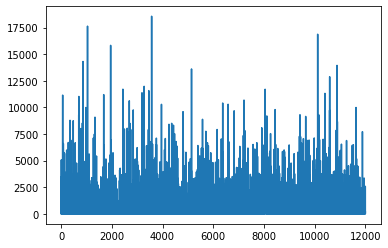

In [0]:
Train_data['EQ'].plot()

In [0]:
Train_data_final

,Social_Search_Impressions,Median_Rainfall,Inflation,pct_PromoMarketDollars_Category,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,EQ
0,22256928,0.49298,0.067591,0.19960,5420048,475559,0.3766,718.458667
1,4239408,0.07811,0.046174,0.29390,12155631,371540,0.2515,25.521137
2,6708500,0.94863,0.026979,0.31483,11939870,225984,0.3679,268.288044
3,36835247,0.70916,0.106558,0.07673,7045541,551342,0.0504,209.071599
4,23693467,0.96547,0.129135,0.36388,11488805,254143,0.2219,3482.169185
...,...,...,...,...,...,...,...,...
11995,25770808,0.71889,0.116807,0.18239,8272828,457864,0.3466,2590.892697
11996,37456881,0.49258,0.065009,0.05693,4472051,458844,0.2238,156.792378
11997,24982441,0.99117,0.074154,0.36290,1575934,563762,0.0703,208.095996
11998,35213911,0.41459,0.021332,0.42034,9391109,582726,0.0599,214.557394


In [0]:
from sklearn.preprocessing import MinMaxScaler


In [0]:
scaler = MinMaxScaler()
#scaler.fit(Train_data_final)
normalized_train_data=scaler.fit_transform(Train_data_final)

In [0]:
from statsmodels.tsa.vector_ar.var_model import VAR


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
model = VAR(endog=normalized_train_data)
#model_fit = model.fit()
#model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -23.521040514030677
BIC :  -23.476681345881545
FPE :  6.094553546759875e-11
HQIC:  -23.506160235616022 

Lag Order = 2
AIC :  -23.515816196927897
BIC :  -23.432020618185028
FPE :  6.126476822087837e-11
HQIC:  -23.487706862874354 

Lag Order = 3
AIC :  -23.512913962402017
BIC :  -23.38967628802484
FPE :  6.144283324489451e-11
HQIC:  -23.471573556689485 

Lag Order = 4
AIC :  -23.510031749496353
BIC :  -23.347346293133782
FPE :  6.162018389233724e-11
HQIC:  -23.455458255626763 

Lag Order = 5
AIC :  -23.5063384395619
BIC :  -23.30419951355191
FPE :  6.184819341973138e-11
HQIC:  -23.438529840559053 

Lag Order = 6
AIC :  -23.50244239814656
BIC :  -23.26084431351578
FPE :  6.208963590954479e-11
HQIC:  -23.421396676555986 

Lag Order = 7
AIC :  -23.49775846493774
BIC :  -23.216695531401037
FPE :  6.238115481443097e-11
HQIC:  -23.403473602826534 

Lag Order = 8
AIC :  -23.493288333604514
BIC :  -23.172754859564584
FPE :  6.266064829126174e-11
HQIC:  -23.38576231256119 



In [0]:
x = model.select_order(maxlags=10)
x.summary()

,AIC,BIC,FPE,HQIC
0,-23.53*,-23.52*,6.056e-11*,-23.53*
1,-23.52,-23.48,6.091e-11,-23.51
2,-23.52,-23.43,6.123e-11,-23.49
3,-23.51,-23.39,6.144e-11,-23.47
4,-23.51,-23.35,6.162e-11,-23.46
5,-23.51,-23.30,6.187e-11,-23.44
6,-23.50,-23.26,6.210e-11,-23.42
7,-23.50,-23.22,6.241e-11,-23.40
8,-23.49,-23.17,6.268e-11,-23.39
9,-23.49,-23.13,6.292e-11,-23.37


In [0]:
model_fitted = model.fit(32)


model_fitted

In [0]:
prediction = model_fitted.forecast(y=normalized_train_data[-32:], steps=len(Valid))
#Valid.head()

In [0]:
prediction

array([[0.45794285, 0.48173449, 0.50949006, 0.48276965, 0.44361653,
        0.52250145, 0.51317378, 0.02217822],
       [0.49377147, 0.51108967, 0.43040855, 0.41572691, 0.46320998,
        0.57268776, 0.56269817, 0.02479483],
       [0.49869227, 0.52827855, 0.4225572 , 0.52585077, 0.49688624,
        0.53667977, 0.52477128, 0.0318693 ],
       [0.54339658, 0.4273208 , 0.51984512, 0.51083677, 0.52449383,
        0.45824612, 0.51806412, 0.03537974],
       [0.51665734, 0.52332598, 0.53025931, 0.47996291, 0.55655768,
        0.55529941, 0.47286151, 0.04492232],
       [0.45404978, 0.43976017, 0.54300093, 0.51650241, 0.46189449,
        0.49188294, 0.49624286, 0.03352885],
       [0.52954722, 0.53242473, 0.50256378, 0.50613981, 0.45508812,
        0.48696813, 0.53371337, 0.02110103],
       [0.48482547, 0.42720628, 0.49017595, 0.52671833, 0.48521175,
        0.48936189, 0.48704943, 0.01528887],
       [0.54686783, 0.47834934, 0.47356639, 0.49854719, 0.47649685,
        0.48502096, 0.525298

In [0]:
import matplotlib.pyplot as plt
pd.concat([Train_data,Valid]).head()

,Day,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory,Period
0,1.0,718.458667,22256928.0,56812.0,7724107.0,238700.0,151438.0,1044.0,112229070.0,2133614.0,5.0,11.0,62.0,55.0,0.49298,8.069,0.067591,7708.0,42.77,43.09,13.663,5.25,1.580,1.679,446172630,20.58,2.8135,0.19960,36.223,54.17,16.46,105.71,36.13,46.36,71.83,5420048.0,475559.0,0.3766,45.77,NaN
1,2.0,25.521137,4239408.0,105695.0,5844288.0,188902.0,264008.0,113582.0,284597324.0,1719318.0,38.0,14.0,59.0,61.0,0.07811,9.328,0.046174,6693.0,42.84,44.26,9.632,1.87,0.806,1.654,856199835,26.53,2.3588,0.29390,43.028,65.79,15.64,111.79,43.31,47.58,67.90,12155631.0,371540.0,0.2515,35.02,NaN
2,3.0,268.288044,6708500.0,87686.0,13008485.0,19704.0,150505.0,38501.0,807781054.0,1569740.0,9.0,33.0,51.0,33.0,0.94863,9.553,0.026979,2699.0,42.95,48.33,14.728,5.64,3.026,1.620,503553502,14.92,2.8399,0.31483,42.031,45.08,23.91,110.15,38.26,49.26,72.70,11939870.0,225984.0,0.3679,46.22,NaN
3,4.0,209.071599,36835247.0,70791.0,2520814.0,200111.0,253458.0,53719.0,667441334.0,922723.0,9.0,43.0,56.0,51.0,0.70916,7.838,0.106558,4898.0,43.53,59.10,0.465,2.86,1.006,1.620,463383476,28.92,2.7889,0.07673,41.377,75.24,13.06,116.74,39.37,44.21,73.01,7045541.0,551342.0,0.0504,38.10,NaN
4,5.0,3482.169185,23693467.0,75610.0,9276779.0,65532.0,278877.0,95178.0,74045467.0,1834970.0,26.0,22.0,48.0,54.0,0.96547,8.085,0.129135,8678.0,43.83,48.50,9.217,4.28,3.681,1.434,692252839,36.12,2.8071,0.36388,38.153,56.85,40.72,115.18,36.85,45.46,75.84,11488805.0,254143.0,0.2219,39.16,NaN


In [0]:
pd.concat([Train_data.iloc[:,1],Valid.iloc[:,1]])

0      718.458667
1       25.521137
2      268.288044
3      209.071599
4     3482.169185
         ...     
34     175.432319
35     168.106665
36     161.529279
37     151.642231
38     130.937361
Name: EQ, Length: 12039, dtype: float64

In [0]:
import numpy as np
scaler = MinMaxScaler()
#scaler.fit(np.array(pd.concat([Train_data,Valid]).iloc[:,1]).reshape(-1, 1))
normalized_complete_data=scaler.fit_transform(np.array(pd.concat([Train_data.iloc[:,1],Valid.iloc[:,1]])).reshape(-1, 1))
normalized_complete_data

array([[0.03871413],
       [0.00137419],
       [0.01445604],
       ...,
       [0.00870319],
       [0.00817041],
       [0.0070547 ]])

In [0]:
np.array(pd.concat([Train_data,Valid]).iloc[:,1]).reshape(-1, 1)

array([[718.4586667 ],
       [ 25.52113734],
       [268.2880438 ],
       ...,
       [161.529279  ],
       [151.6422314 ],
       [130.9373608 ]])

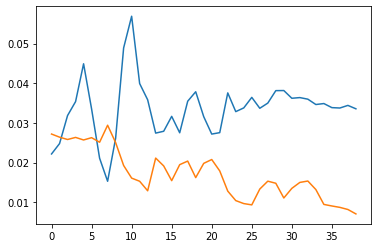

In [0]:
import matplotlib.pyplot as plt
plt.plot(prediction[:,7] )
plt.plot(normalized_complete_data[-len(Valid):])


***Mean squared error regression loss***

In [0]:
from sklearn.metrics import mean_squared_error

mean_squared_error(normalized_complete_data[-len(Valid):], prediction[:,1])

0.23315810235190065

**PREDICTIONS**

In [0]:

pred = scaler.inverse_transform(np.array(prediction[:,1]).reshape(-1,1))
pred

array([[ 8939.82859431],
       [ 9484.58871183],
       [ 9803.5721058 ],
       [ 7930.04411364],
       [ 9711.6644526 ],
       [ 8160.88830263],
       [ 9880.51493031],
       [ 7927.91888478],
       [ 8877.00859957],
       [ 9575.24908298],
       [ 9719.20699976],
       [ 9958.51139317],
       [ 9421.09925671],
       [ 8363.83428978],
       [ 9492.91093886],
       [ 8796.34829454],
       [ 9253.16375279],
       [ 8798.32833766],
       [ 9067.49300258],
       [ 9007.84618938],
       [ 9262.12958221],
       [ 9133.11987623],
       [ 9016.38386047],
       [ 9751.24016201],
       [ 9607.10220471],
       [10097.14180363],
       [ 9775.917076  ],
       [ 9300.87023145],
       [ 9113.40933396],
       [ 9520.81535443],
       [ 9503.91737056],
       [ 9373.46060765],
       [ 9422.99996282],
       [ 9330.99510757],
       [ 9333.46540163],
       [ 9405.13262317],
       [ 9359.21684485],
       [ 9404.45019139],
       [ 9282.41660114]])